# Results analysis

#### dataset Loading and options 

In [25]:
from datasets import Dataset,load_dataset
import pandas as pd
import seaborn as sb

dataset_split_name ="simpleLLM_benchmark_llama3.370bversatile_t_0.7"#"simpleLLM_benchmark_llama3.18binstant_t_0.7" 

dataset_split = [dataset_split_name][0]

dataset = load_dataset("CharlyR/varbench-evaluation", "tikz", split=dataset_split)
import os

result_path = os.path.join("results",dataset_split_name)
os.mkdir("results/"+dataset_split_name)


Generating simpleLLM_benchmark_llama3.18binstant_t_0.7 split: 100%|██████████| 50/50 [00:00<00:00, 5376.90 examples/s]
Generating simpleLLM_benchmark_llama3.370bversatile_t_0.7 split: 100%|██████████| 50/50 [00:00<00:00, 4422.04 examples/s]


In [26]:
dataset

Dataset({
    features: ['id', 'code', 'instruction', 'result_description', 'difficulty', 'patch', 'code_solution', 'image_solution', 'image_input', 'predictions', 'images_result', 'parsing_score', 'compiling_score', 'predictions_patches', 'ChrfPatchMetric', 'TERMetric', 'MSEMetric', 'MSSSIMMetric', 'PatchMetric', 'BleuPatchMetric', 'LineMetric', 'ClipTextMetric', 'PSNRMetric', 'TERPatchMetric', 'ImageDiffMetric', 'ChrfMetric', 'BleuMetric', 'ClipImageMetric', 'LPIPSMetric', 'FeatureMatchMetric', 'CrystalBleuPatchMetric', 'CrystalBleuMetric'],
    num_rows: 50
})

## Best prediction computation

---
Ignored for now

In [36]:
from results_utils import MetricPolicy


computed_metrics_names = [
    metric_name
    for metric_name in dataset.column_names
    if metric_name.endswith("Metric") and not metric_name.startswith("best")
]


# each metric is computed on list of predictions of length pass@k, and yields a list of list of result of the same length.
# from that list[list[float]](the results), we get the best result according to a certain policy(here the arithmetic mean)
subset = dataset.map(
    MetricPolicy.compute_best_prediction,
    fn_kwargs={"computed_metrics_names": computed_metrics_names},
)

scores = {
    metric_name: sum(subset[f"best_{metric_name}"]) / len(subset)
    for metric_name in computed_metrics_names
}
scores["var_score"] = sum(subset["var_score"]) / len(subset)
scores
result_df = subset.to_pandas()

Map: 100%|██████████| 50/50 [00:00<00:00, 986.00 examples/s]


## Pre-Filtering

In [37]:
# filtering by having a result
filtered_df = result_df[result_df["index_best_prediction"] != -1]

# ordering by text metrics
text_metrics = [
    metric_name
    for metric_name in computed_metrics_names
    if any((substring in metric_name) for substring in ["TER", "Line", "Bleu", "Chrf","Patch"])
]
other_metrics = list(set(computed_metrics_names) - set(text_metrics))
ordered_metrics = text_metrics + other_metrics
filtered_df = filtered_df[ordered_metrics + ["id", "difficulty"]]
filtered_df

,ChrfPatchMetric,TERMetric,PatchMetric,BleuPatchMetric,LineMetric,TERPatchMetric,ChrfMetric,BleuMetric,CrystalBleuPatchMetric,CrystalBleuMetric,MSEMetric,FeatureMatchMetric,ClipTextMetric,ImageDiffMetric,ClipImageMetric,LPIPSMetric,PSNRMetric,MSSSIMMetric,id,difficulty
0,[5.9570265],[97.83282],[0.0],[0.21382895],[0.0],[51.079136],[98.82658],[96.99815],[0.22252947],[95.861595],[99.803],[58.44156],[23.523575],[67.79696],[99.73671],[97.89512],[44.21449],[96.64063],donkey_higher_mane,hard
1,[39.30989],[87.98077],[0.0],[9.100294],[0.0],[50.0],[95.581985],[91.76656],[7.291042],[88.618225],[99.39065],[75.675674],[26.442207],[76.2417],[99.60461],[95.96228],[44.553997],[92.16988],chimpanzee_squint_crosseyes,medium
3,[0.0],[78.82736],[0.0],[0.0],[0.0],[50.0],[97.16698],[84.56666],[0.0],[84.264595],[99.99531],[97.82609],[25.189657],[85.84502],[99.47744],[99.51897],[57.341003],[99.87364],shark_no_teeth,easy
4,[45.163486],[84.39898],[0.0],[9.289393],[0.0],[59.183674],[93.07294],[87.77112],[8.153658],[86.72467],[99.90541],[75.80645],[26.829615],[77.030975],[99.73108],[97.11517],[48.119865],[97.11196],shark_other_set_pectoral_fin,hard
5,[94.38561],[99.59514],[0.0],[87.98805],[100.0],[94.44444],[99.73184],[99.46792],[85.77364],[99.029205],[99.999176],[98.3871],[28.779165],[92.7459],[99.97912],[99.921104],[51.139526],[99.96614],dog_red_eyes,easy
6,[83.128044],[98.46154],[0.0],[62.665752],[100.0],[82.14286],[99.25818],[97.796646],[59.68539],[96.45286],[99.79936],[91.42857],[26.093084],[75.2954],[95.855354],[95.788155],[44.410053],[96.00095],monkey_sad,easy
7,[66.25533],[98.75519],[0.0],[51.410393],[0.0],[70.491806],[99.395744],[98.27264],[49.25108],[97.7659],[99.56907],[77.10844],[26.934872],[72.23858],[99.86142],[98.95302],[45.425568],[97.512054],squid_bigger_eyes,medium
8,[87.72034],[97.23757],[0.0],[63.917538],[100.0],[71.014496],[97.83453],[96.30105],[63.498093],[93.07527],[99.34083],[45.333332],[26.84401],[65.50333],[98.467575],[93.722855],[38.876728],[80.61351],chimpanzee_blue_fur,easy
9,[17.15106],[95.665634],[0.0],[0.40559855],[0.0],[50.0],[97.49441],[94.50346],[0.28282097],[90.692726],[99.80149],[73.25581],[26.63347],[64.61487],[99.18252],[97.38159],[42.137695],[95.541885],cow_longer_horns,medium
10,[95.84128],[99.570816],[0.0],[93.87153],[100.0],[94.44444],[99.73728],[99.41463],[93.653534],[99.22969],[99.98808],[97.59036],[28.056961],[75.20385],[99.780815],[99.93193],[48.51981],[99.28458],squid_O_mouth,medium


In [38]:
from results_utils import flatten_metrics
#flattening the pass arrays
flatten_df = flatten_metrics(filtered_df,ordered_metrics)

In [39]:
flatten_df

,ChrfPatchMetric,TERMetric,PatchMetric,BleuPatchMetric,LineMetric,TERPatchMetric,ChrfMetric,BleuMetric,CrystalBleuPatchMetric,CrystalBleuMetric,MSEMetric,FeatureMatchMetric,ClipTextMetric,ImageDiffMetric,ClipImageMetric,LPIPSMetric,PSNRMetric,MSSSIMMetric,difficulty,id
0,5.957026,97.832817,0.0,0.213829,0.000000,51.079136,98.826576,96.998154,0.222529,95.861595,99.803001,58.441559,23.523575,67.796959,99.736710,97.895119,44.214489,96.640633,hard,donkey_higher_mane
1,39.309891,87.980766,0.0,9.100294,0.000000,50.000000,95.581985,91.766563,7.291042,88.618225,99.390648,75.675674,26.442207,76.241699,99.604607,95.962280,44.553997,92.169884,medium,chimpanzee_squint_crosseyes
2,0.000000,78.827362,0.0,0.000000,0.000000,50.000000,97.166977,84.566658,0.000000,84.264595,99.995308,97.826088,25.189657,85.845016,99.477440,99.518967,57.341003,99.873642,easy,shark_no_teeth
3,45.163486,84.398979,0.0,9.289393,0.000000,59.183674,93.072937,87.771118,8.153658,86.724670,99.905411,75.806450,26.829615,77.030975,99.731079,97.115173,48.119865,97.111961,hard,shark_other_set_pectoral_fin
4,94.385612,99.595139,0.0,87.988052,100.000000,94.444443,99.731842,99.467918,85.773643,99.029205,99.999176,98.387100,28.779165,92.745903,99.979118,99.921104,51.139526,99.966141,easy,dog_red_eyes
5,83.128044,98.461540,0.0,62.665752,100.000000,82.142860,99.258179,97.796646,59.685390,96.452858,99.799362,91.428574,26.093084,75.295403,95.855354,95.788155,44.410053,96.000954,easy,monkey_sad
6,66.255333,98.755188,0.0,51.410393,0.000000,70.491806,99.395744,98.272636,49.251080,97.765900,99.569069,77.108437,26.934872,72.238579,99.861420,98.953018,45.425568,97.512054,medium,squid_bigger_eyes
7,87.720337,97.237572,0.0,63.917538,100.000000,71.014496,97.834534,96.301048,63.498093,93.075272,99.340828,45.333332,26.844009,65.503326,98.467575,93.722855,38.876728,80.613510,easy,chimpanzee_blue_fur
8,17.151060,95.665634,0.0,0.405599,0.000000,50.000000,97.494408,94.503464,0.282821,90.692726,99.801491,73.255814,26.633471,64.614868,99.182518,97.381592,42.137695,95.541885,medium,cow_longer_horns
9,95.841278,99.570816,0.0,93.871529,100.000000,94.444443,99.737282,99.414627,93.653534,99.229691,99.988083,97.590363,28.056961,75.203850,99.780815,99.931931,48.519810,99.284576,medium,squid_O_mouth


## no subcategories

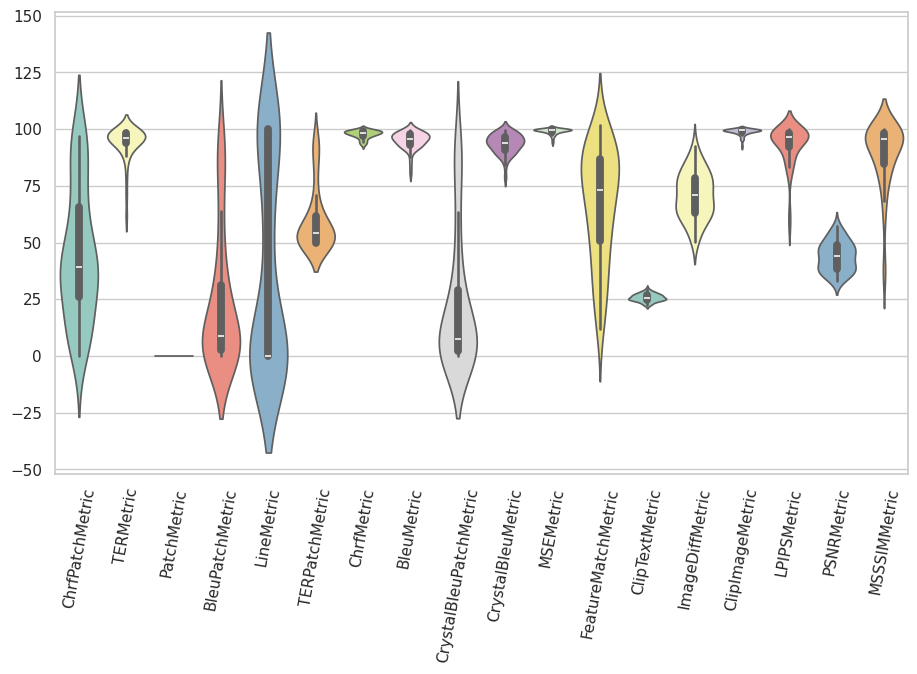

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))
plt.xticks(rotation=80)

# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=flatten_df, palette="Set3")
plt.savefig(os.path.join(result_path,"violin_all_metrics.png"), dpi=300, bbox_inches="tight")


In [41]:
flatten_df[flatten_df.columns.difference(['difficulty','id'])].mean(axis=0)

BleuMetric                95.065483
BleuPatchMetric           23.639280
ChrfMetric                97.796440
ChrfPatchMetric           44.664532
ClipImageMetric           98.879570
ClipTextMetric            25.775864
CrystalBleuMetric         93.598633
CrystalBleuPatchMetric    22.745705
FeatureMatchMetric        66.764412
ImageDiffMetric           70.947624
LPIPSMetric               93.188354
LineMetric                39.007092
MSEMetric                 99.093338
MSSSIMMetric              89.018852
PSNRMetric                43.884979
PatchMetric                0.000000
TERMetric                 94.154823
TERPatchMetric            59.779194
dtype: float32

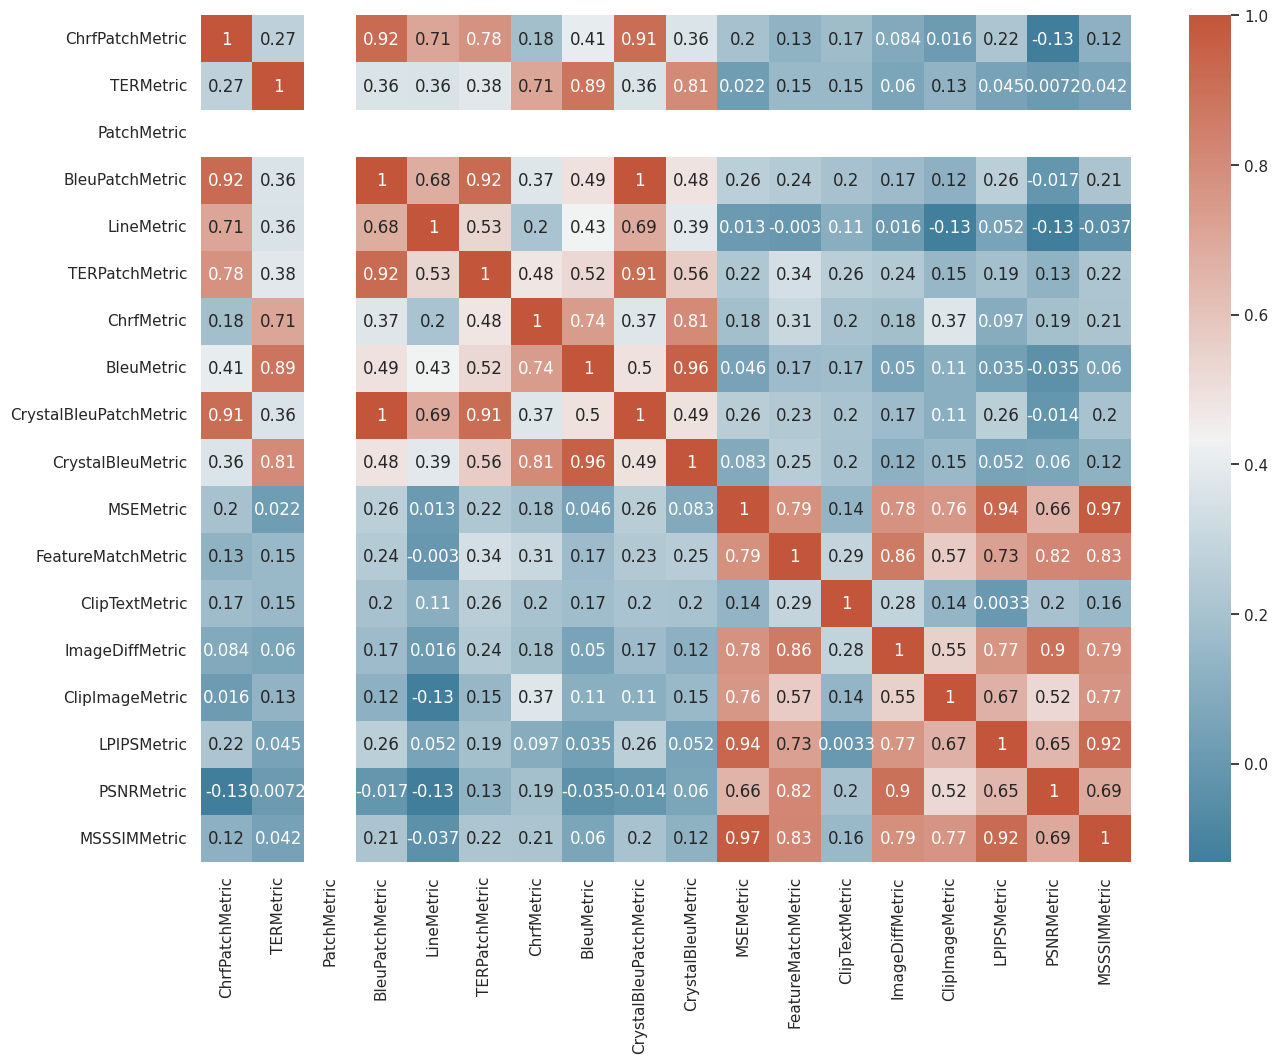

In [42]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")


# Compute the correlation matrix
corr = flatten_df.select_dtypes(["int","float"]).corr()


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap, annot=True)
plt.savefig(os.path.join(result_path,"heatmap_correlation.png"), dpi=300, bbox_inches="tight")


## filtered by difficulty

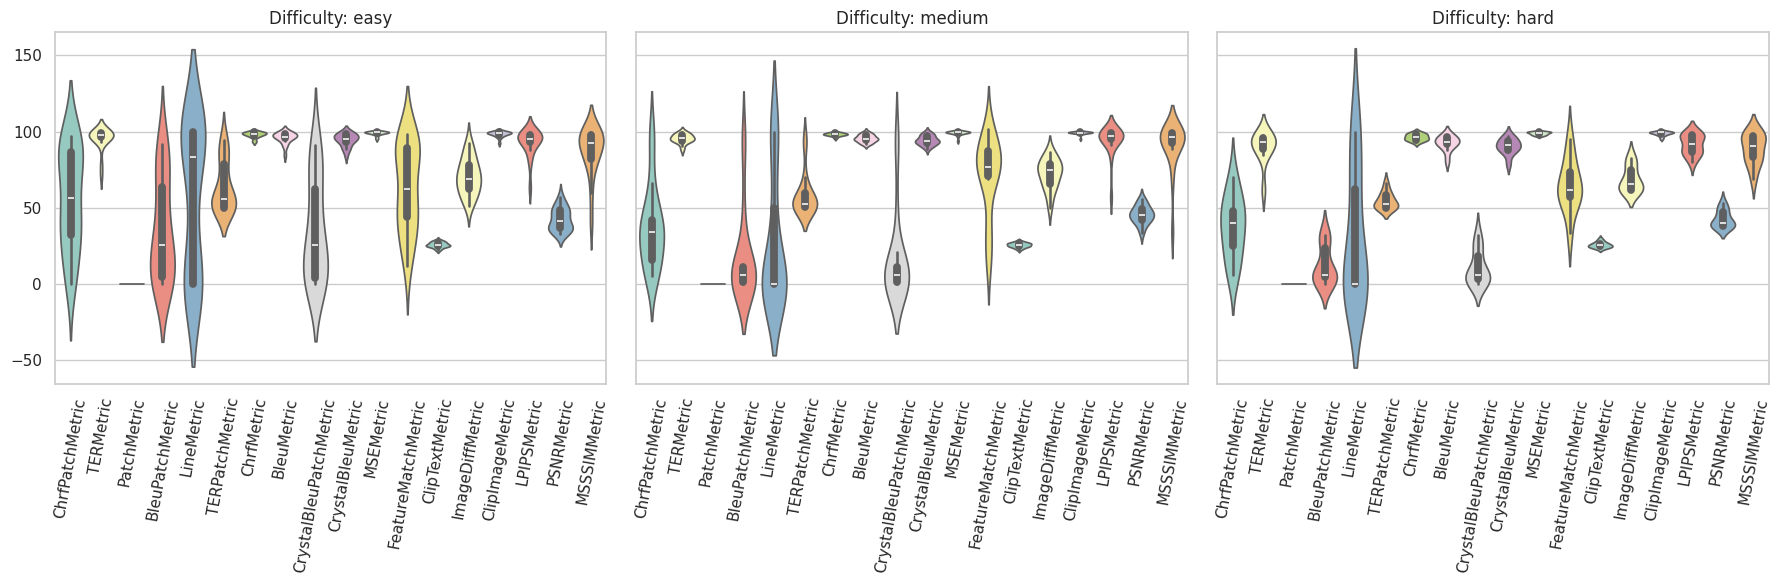

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

df_difficulty = flatten_df.drop("id",axis=1)
df_difficulty

sns.set_theme(style="whitegrid")

# Assuming 'difficulty' column exists in the DataFrame
difficulties = ['easy', 'medium', 'hard']
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)  # Create 3 subplots

for i, difficulty in enumerate(difficulties):
    sns.violinplot(
        data=df_difficulty[df_difficulty['difficulty'] == difficulty], 
        ax=axes[i], 
        palette="Set3"
    )
    axes[i].set_title(f'Difficulty: {difficulty}')
    axes[i].tick_params(axis='x', rotation=80)

plt.tight_layout()
plt.savefig(os.path.join(result_path,"violin_by_difficulty.png"), dpi=300, bbox_inches="tight")
plt.show()


In [44]:
df_difficulty['difficulty'] = pd.Categorical(df_difficulty['difficulty'], categories=['easy', 'medium', 'hard'], ordered=True)
averages = df_difficulty.groupby('difficulty',observed=True).mean()
averages.to_csv(os.path.join(result_path,"avg_by_difficulty.csv"))

averages

,ChrfPatchMetric,TERMetric,PatchMetric,BleuPatchMetric,LineMetric,TERPatchMetric,ChrfMetric,BleuMetric,CrystalBleuPatchMetric,CrystalBleuMetric,MSEMetric,FeatureMatchMetric,ClipTextMetric,ImageDiffMetric,ClipImageMetric,LPIPSMetric,PSNRMetric,MSSSIMMetric
difficulty,,,,,,,,,,,,,,,,,,
easy,56.317421,95.168694,0.0,36.291573,56.481483,63.985832,98.083435,96.002327,35.522182,94.599678,99.060509,63.357849,25.845795,70.711098,98.474327,92.760132,42.647049,87.226830
medium,37.442440,95.528954,0.0,17.619898,26.315790,58.431648,98.262314,95.586815,16.906591,94.339165,99.188683,71.070465,25.698801,72.256561,99.273293,94.421440,45.655975,90.908028
hard,37.411320,89.719040,0.0,12.301981,31.666666,54.767578,96.394638,92.388657,10.842379,90.389725,98.971291,64.714706,25.796413,68.886383,98.860947,91.616272,42.748367,88.655052


In [45]:
med = df_difficulty.groupby('difficulty',observed=True).median()
med.to_csv(os.path.join(result_path,"med_by_difficulty.csv"))
med

,ChrfPatchMetric,TERMetric,PatchMetric,BleuPatchMetric,LineMetric,TERPatchMetric,ChrfMetric,BleuMetric,CrystalBleuPatchMetric,CrystalBleuMetric,MSEMetric,FeatureMatchMetric,ClipTextMetric,ImageDiffMetric,ClipImageMetric,LPIPSMetric,PSNRMetric,MSSSIMMetric
difficulty,,,,,,,,,,,,,,,,,,
easy,56.438305,97.689270,0.0,25.955952,83.333328,55.544357,98.645203,96.579201,25.743456,95.470963,99.664536,62.361992,25.444635,69.091949,99.187599,95.536201,41.122070,92.428490
medium,34.493690,95.665634,0.0,5.763237,0.000000,52.777779,98.218254,95.466881,6.106999,93.805275,99.671272,77.108437,25.626451,74.702484,99.464622,97.381592,45.606182,96.787094
hard,40.115948,93.408966,0.0,6.295636,0.000000,52.868359,96.520767,92.944717,5.712650,90.961731,99.248352,61.766483,25.392262,65.606598,99.540253,92.076630,40.267082,90.645622
